In [1]:
import sys
sys.path.append('..')

In [2]:
from tools import bar_chart
from market import Instruments
import h5py
import matplotlib.pyplot as plt

In [3]:
file = h5py.File('training_set/trend_100.h5py')

In [6]:
num_dim = 4
window = 100

In [7]:
if 'X' not in file.keys():
    file.create_dataset('X', (0, window, num_dim), maxshape=(None, window, num_dim), dtype='float32')
    file.create_dataset('Y', (0,), maxshape=(None,), dtype='i')

In [8]:
X, Y  = file['X'], file['Y']

In [12]:
a = Instruments.get(has_history=True)[0].to_df(start=500)

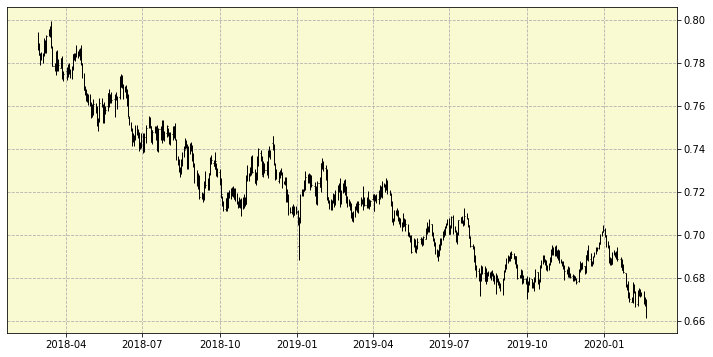

In [13]:
plt.figure(figsize=(12,6))
ax = plt.subplot()
bar_chart(ax, a)
plt.show()

In [20]:
ax

<Figure size 432x288 with 0 Axes>

In [1]:
def define_trend(filepath, raw_file, window):
    """
    * 주어진 차트를 보고 사용자의 경험에 근거로 현재 추세를 결정하는 함수
    * 이 자료는 기계학습의 훈련 데이터로 사용됨
    args:
        filepath: 저장할 파일 경로
        raw_data: h5py로 저장된 시장 OHLC 데이터
        window: 타임 윈도우
        num_dim: label 갯수 ex) ohlcv = 5
    """

    file = open_file('h5py', filepath, mode='a')
    num_dim = 4 #open, high, low, close

    if 'X' not in file.keys():
        file.create_dataset('X', (0, window, num_dim), maxshape=(None, window, num_dim), dtype='float32', compression='gzip')
        file.create_dataset('Y', (0,), maxshape=(None,), dtype='i')
    
    X, Y  = file['X'], file['Y']
    names = [name for name in raw_file]
    

    while True:
        name = np.random.choice(names)
        raw_data = dataframe(name, raw_file).reset_index(drop=True)

        length = len(raw_data)

        for i in range(10):
            print(name)
            #시작일자 랜덤 설정
            start = np.random.choice(raw_data.index[:-window])
            end = start + window 
            data= raw_data.iloc[start:end]

            #Data Normalization
            base = np.abs(data.close.diff()).mean()
            data = norm(data)

            #그래프 
            fig, (ax) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]}, figsize=(12,14))
            fig.autofmt_xdate()

            s= start - 240
            ohlc_chart(ax[0], raw_data.iloc[s:end], colors=['k','k'], linewidth=1.44)
            ax[0].axvspan(start, end, facecolor='C1', alpha=0.2)

            candle_chart(ax[1], raw_data.iloc[start:end], colors=['red','blue'], linewidth=1.44)
            mean = raw_data[start:end].close.mean()
            ax[1].axhline(y=mean, linewidth=1.2, color='g')
            ymin = raw_data.open.loc[start]-base*2
            ymax = raw_data.open.loc[start]+base*2
            ax[1].axhspan(ymin, ymax, alpha=0.2, color='C1')
            ax[1].axhline(y=raw_data.open.loc[start], linewidth=1.2, color='red')
            
            ax[1].axvline(x= (start + end -1)/2, linewidth=1, color='g')
            plt.show()

            #추세 입력

            time.sleep(0.1)
            print('range: ',data.close.max() - data.close.min())
            trend = input("하락(0), 기타(1), 상승(2): ")
            if trend == 'q' or trend == 'n':
                break
            elif trend in ['0','1','2']:
                size = X.shape[0]
                X.resize(size+1, axis=0)
                Y.resize(size+1, axis=0)
                X[size] = data[['open','high','low','close']].values
                Y[size] = int(trend)

            clear_output(wait=True)
        if trend == 'q':
                #file.close()
                break
        clear_output(wait=True)
    file.close()